In [27]:
# Check dataset structure
print("Inside dataset/:", os.listdir("dataset"))
print("Inside dataset/Train/:", os.listdir(os.path.join("dataset","Train")))
print("Inside dataset/Test/ :", os.listdir(os.path.join("dataset","Test")))


Inside dataset/: ['AI Project ele.py', 'Test', 'Train', 'Validation']
Inside dataset/Train/: ['Train']
Inside dataset/Test/ : ['Test']


In [29]:
import os

# 1) Point to your actual double‑nested dirs
train_dir = os.path.join("dataset", "Train", "Train")
test_dir  = os.path.join("dataset", "Test",  "Test")
valid_dir = os.path.join("dataset", "Validation", "Validation")

# 2) Helper to count files
def total_files(folder_path):
    if not os.path.isdir(folder_path):
        raise FileNotFoundError(f"Folder not found: {folder_path}")
    return len([f for f in os.listdir(folder_path)
                if os.path.isfile(os.path.join(folder_path, f))])

# 3) Build full class‑specific paths
train_files_healthy = os.path.join(train_dir, "Healthy")
train_files_powdery = os.path.join(train_dir, "Powdery")
train_files_rust    = os.path.join(train_dir, "Rust")

valid_files_healthy = os.path.join(valid_dir, "Healthy")
valid_files_powdery = os.path.join(valid_dir, "Powdery")
valid_files_rust    = os.path.join(valid_dir, "Rust")

test_files_healthy  = os.path.join(test_dir, "Healthy")
test_files_powdery  = os.path.join(test_dir, "Powdery")
test_files_rust     = os.path.join(test_dir, "Rust")

# 4) Print counts
print("📦 Training Set:")
print("→ Healthy:", total_files(train_files_healthy))
print("→ Powdery:", total_files(train_files_powdery))
print("→ Rust:", total_files(train_files_rust))

print("\n🧪 Validation Set:")
print("→ Healthy:", total_files(valid_files_healthy))
print("→ Powdery:", total_files(valid_files_powdery))
print("→ Rust:", total_files(valid_files_rust))

print("\n🚀 Test Set:")
print("→ Healthy:", total_files(test_files_healthy))
print("→ Powdery:", total_files(test_files_powdery))
print("→ Rust:", total_files(test_files_rust))


📦 Training Set:
→ Healthy: 458
→ Powdery: 430
→ Rust: 434

🧪 Validation Set:
→ Healthy: 20
→ Powdery: 20
→ Rust: 20

🚀 Test Set:
→ Healthy: 50
→ Powdery: 50
→ Rust: 50


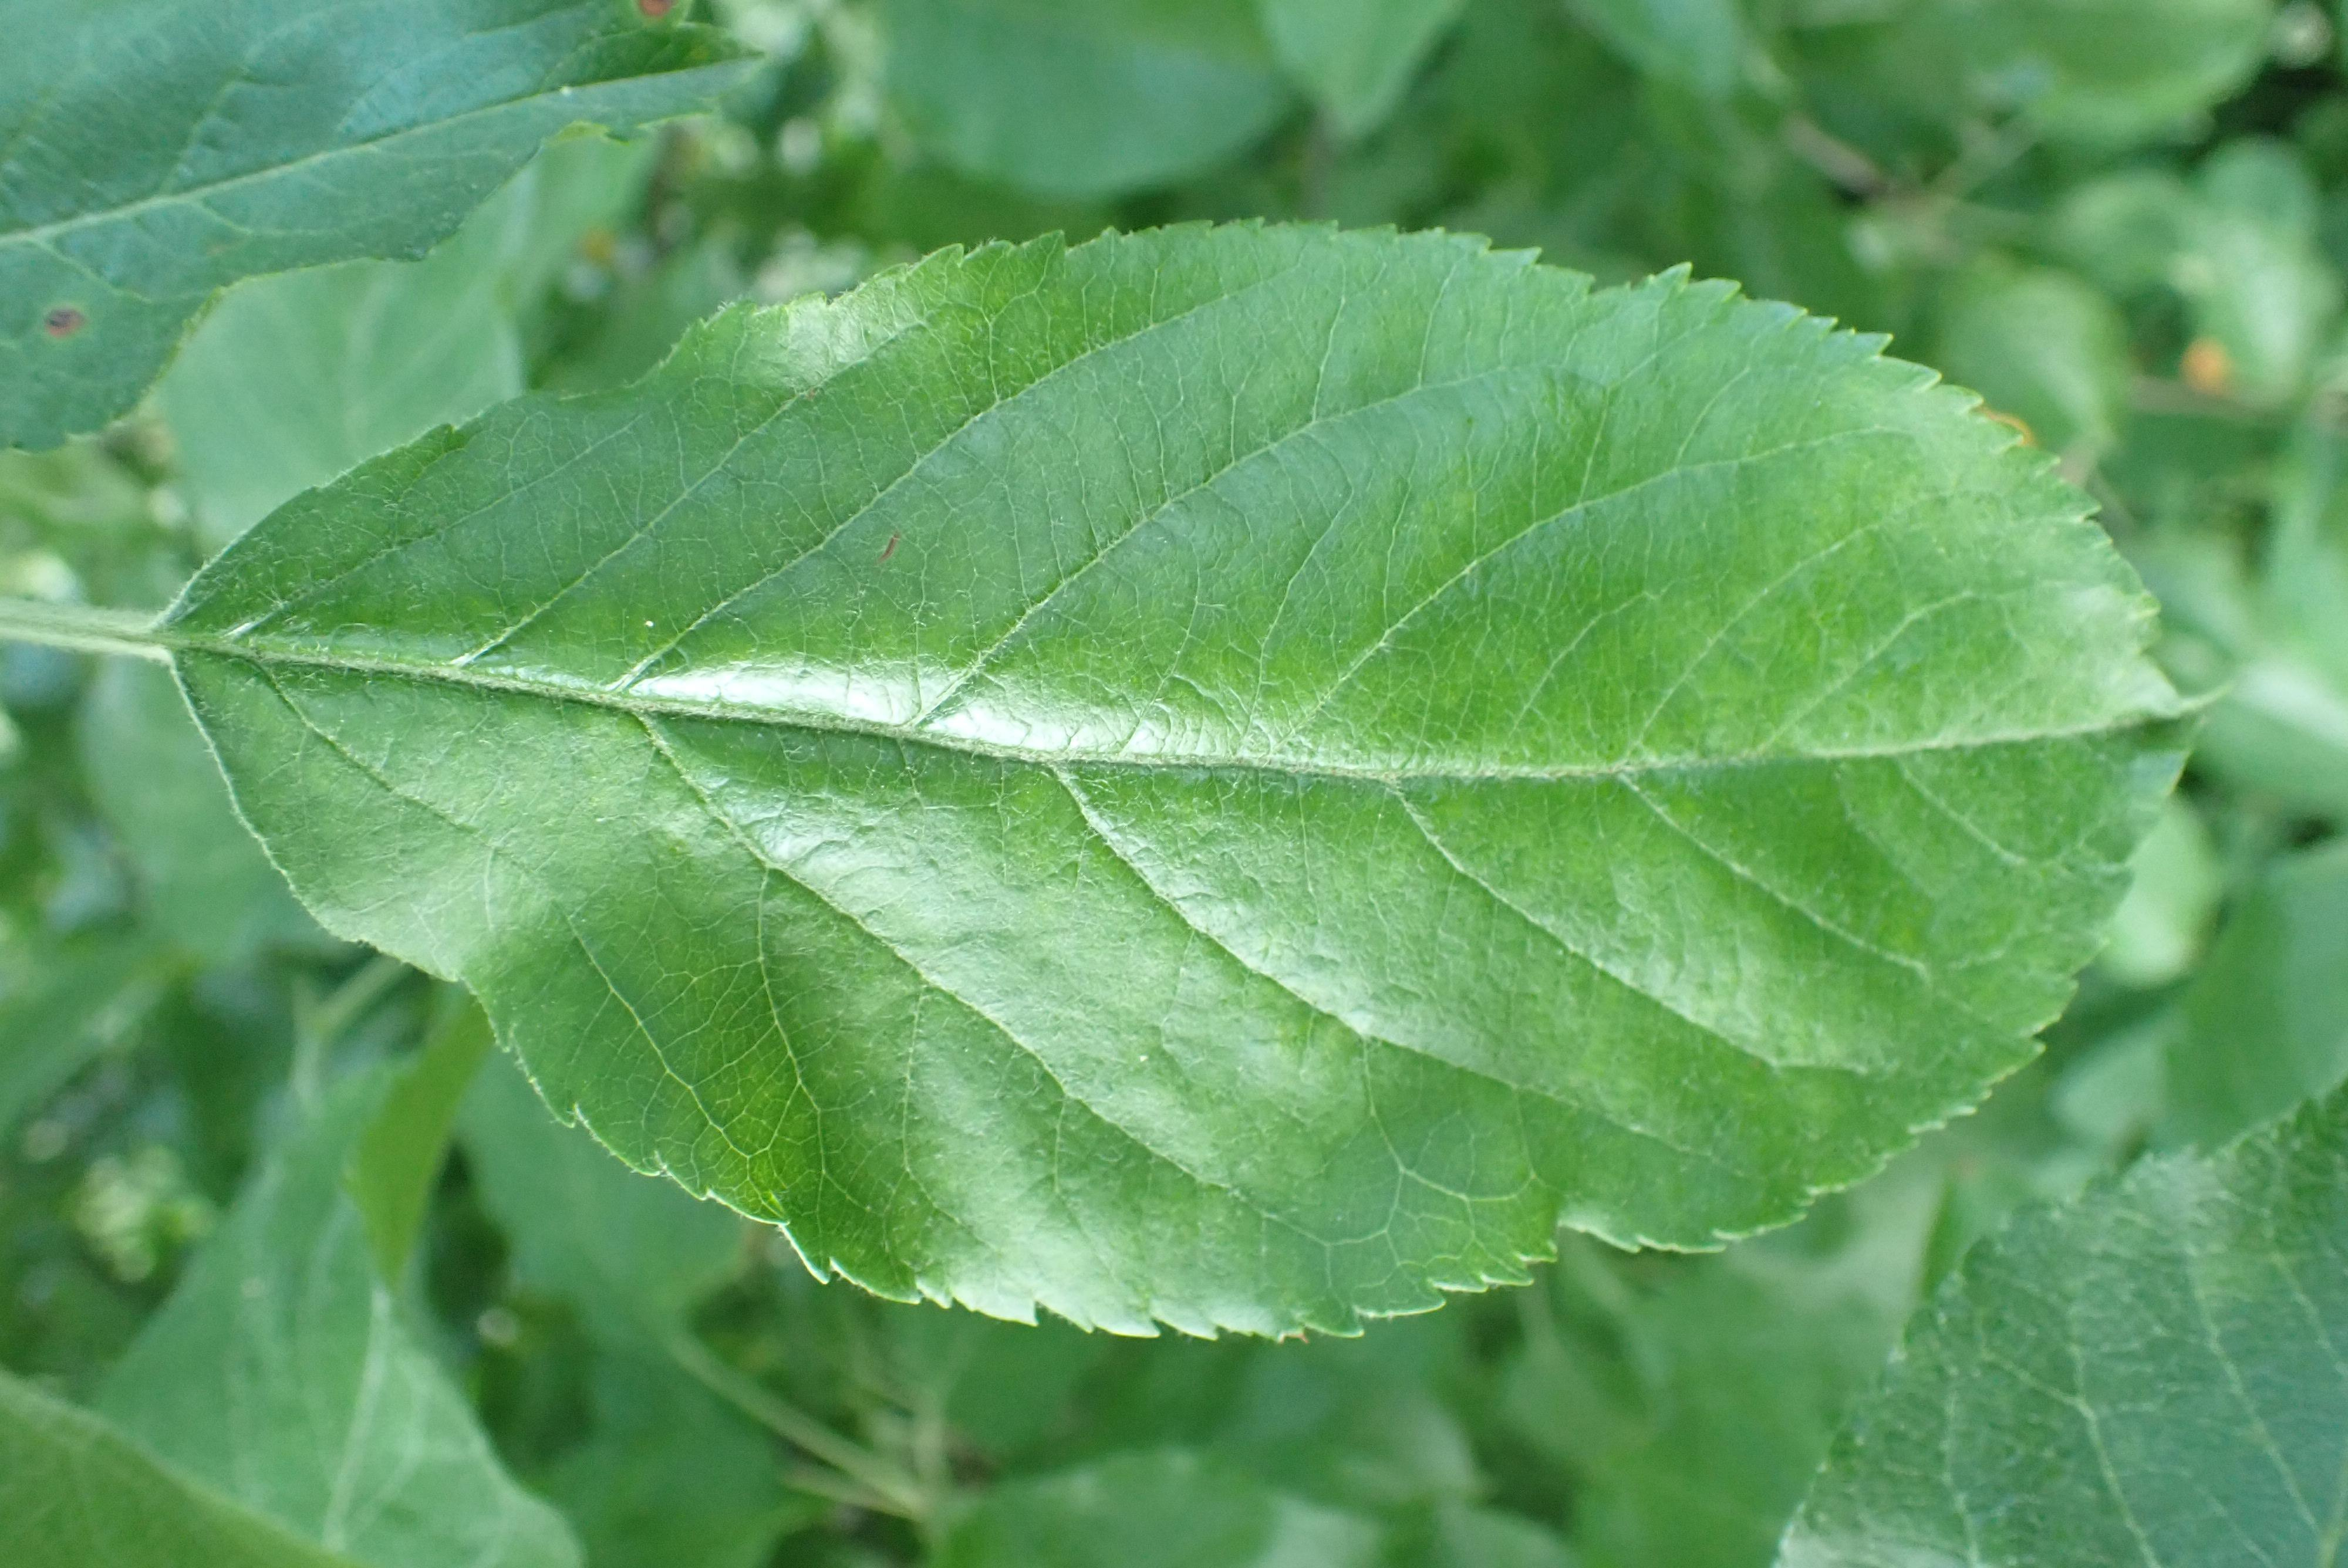

In [33]:
import os
from IPython.display import display, Image

# 1) Point to your train directory (double‑nested)
train_dir = os.path.join("dataset", "Train", "Train")

# 2) File you want to show
filename = "8ce77048e12f3dd4.jpg"

# 3) Build full path
image_path = os.path.join(train_dir, "Healthy", filename)

# 4) Display inline at 500px width
display(Image(filename=image_path, width=500))


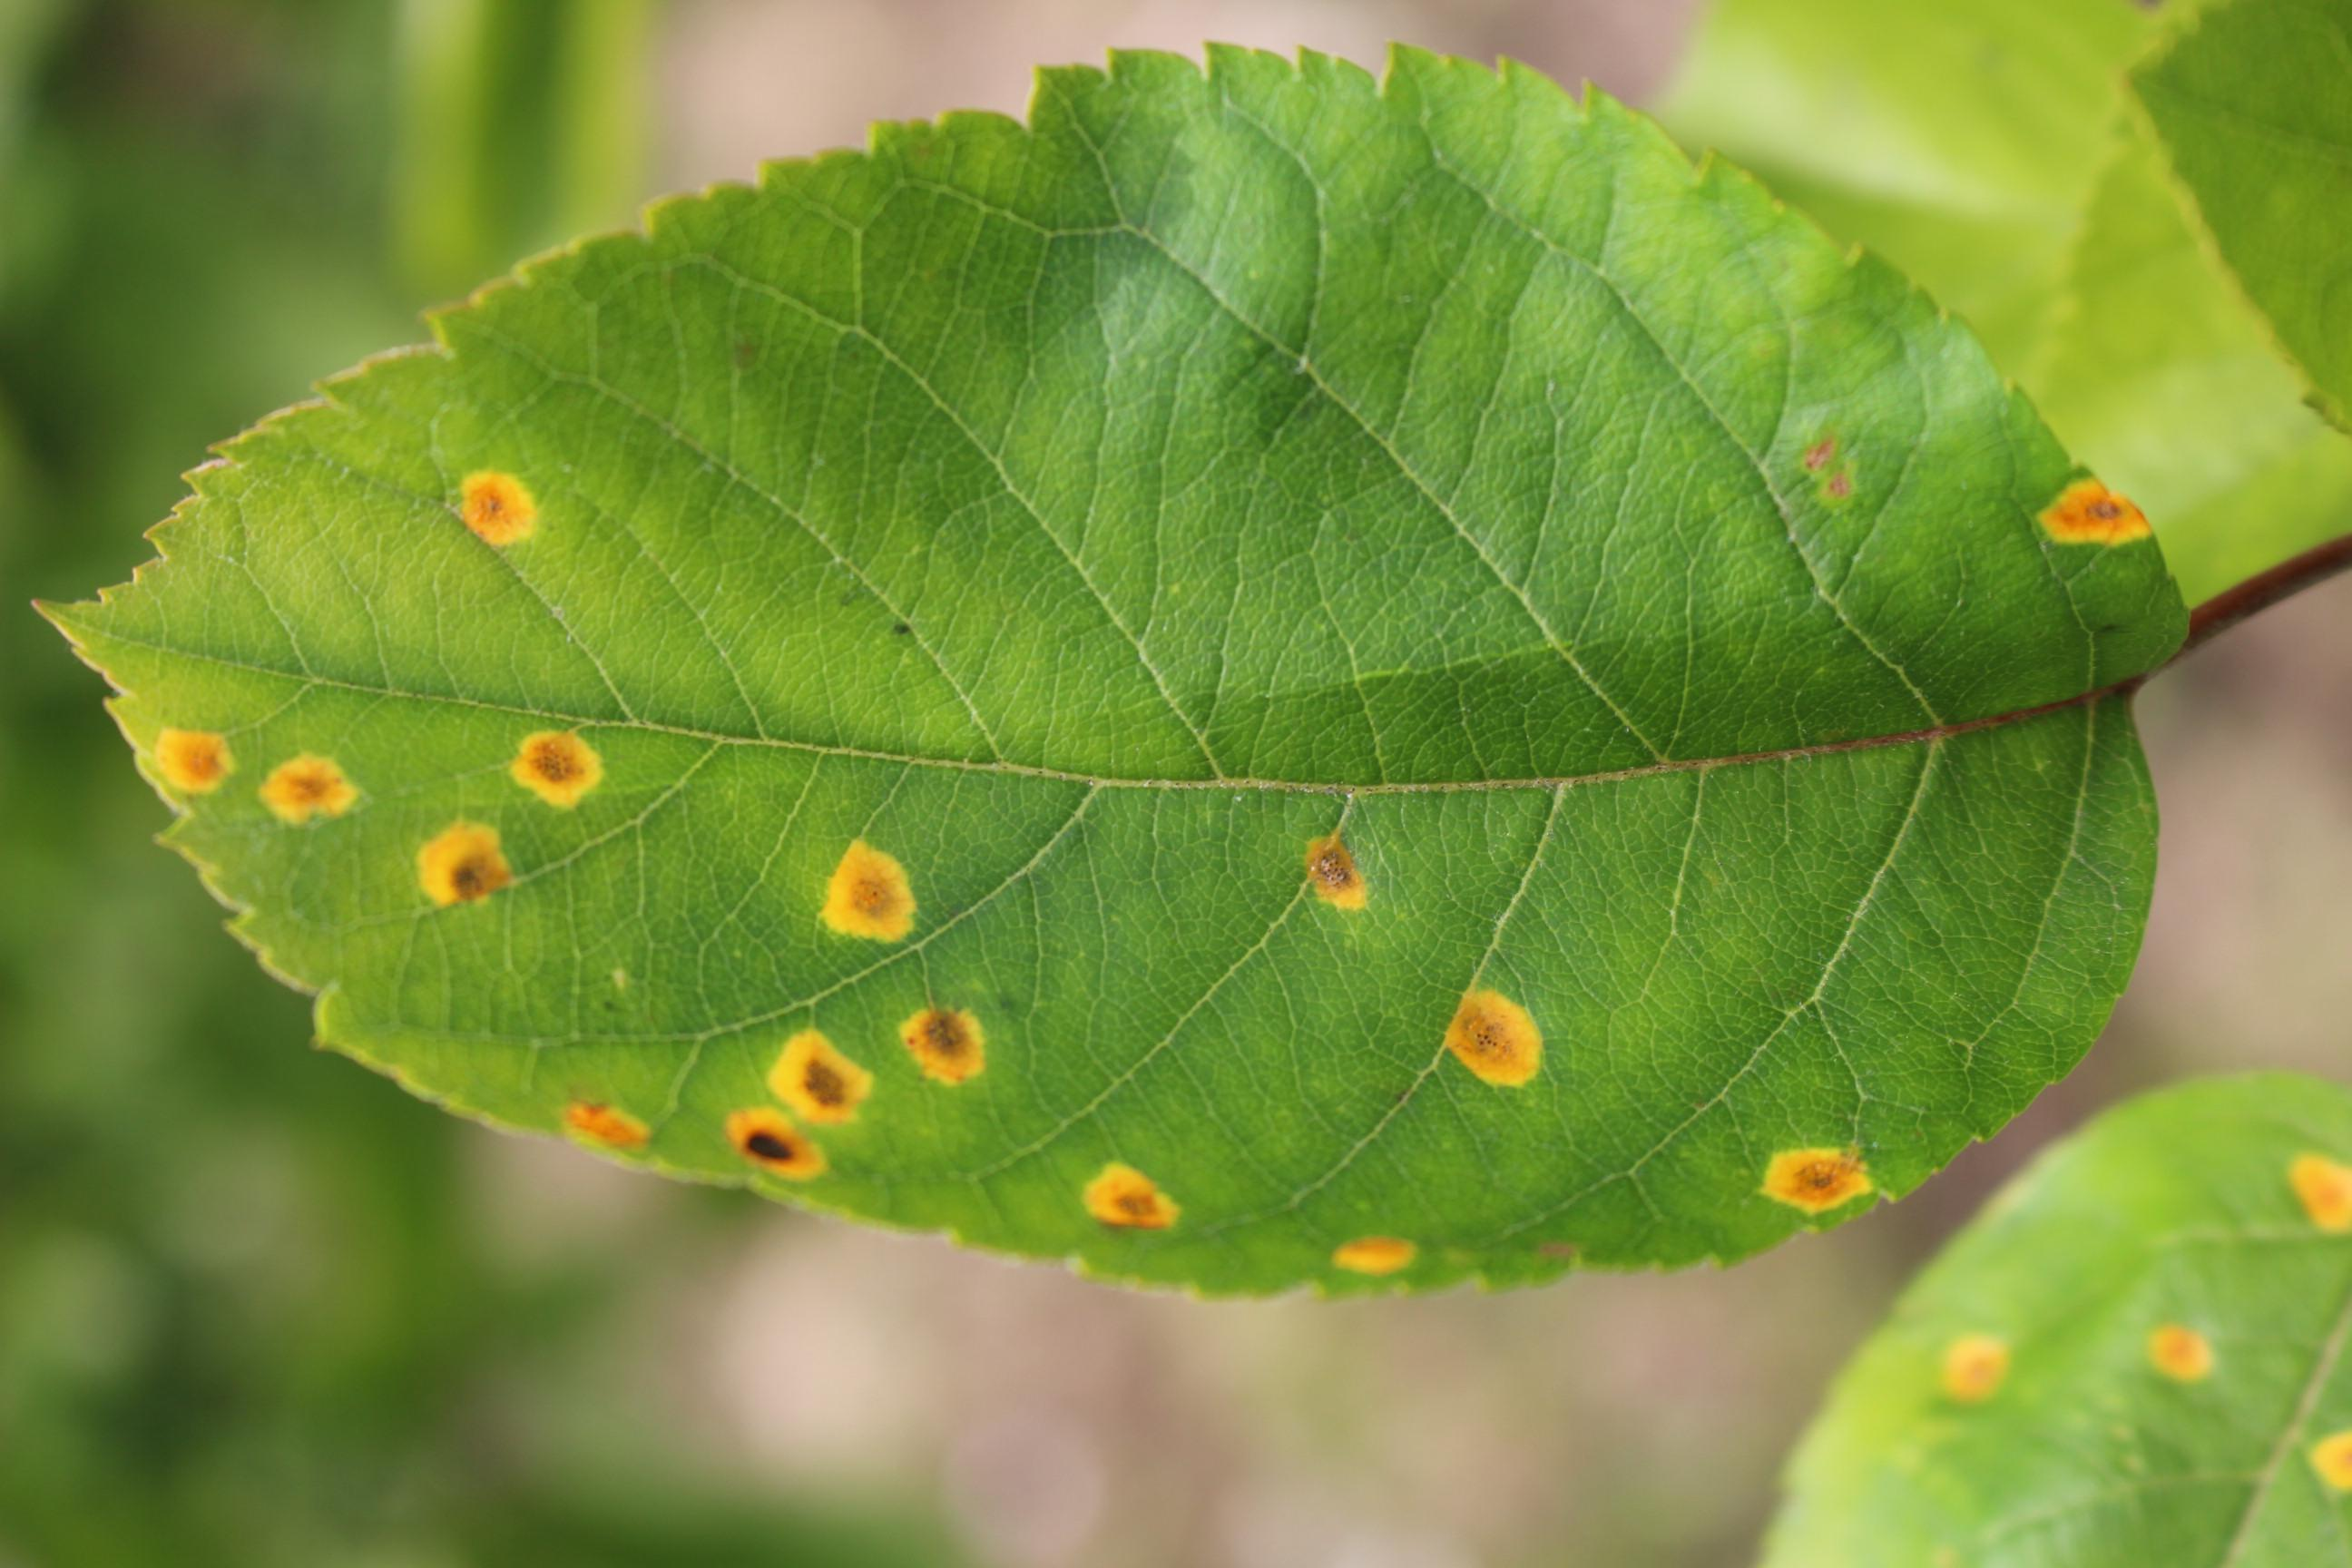

In [37]:
import os
from IPython.display import display, Image

# 1) Base “Train” directory is dataset/Train/Train
train_dir = os.path.join("dataset", "Train", "Train")

# 2) Build full path to your Rust image
image_path = os.path.join(train_dir, "Rust", "80f09587dfc7988e.jpg")

# 3) Display it at 500px width
display(Image(filename=image_path, width=500))


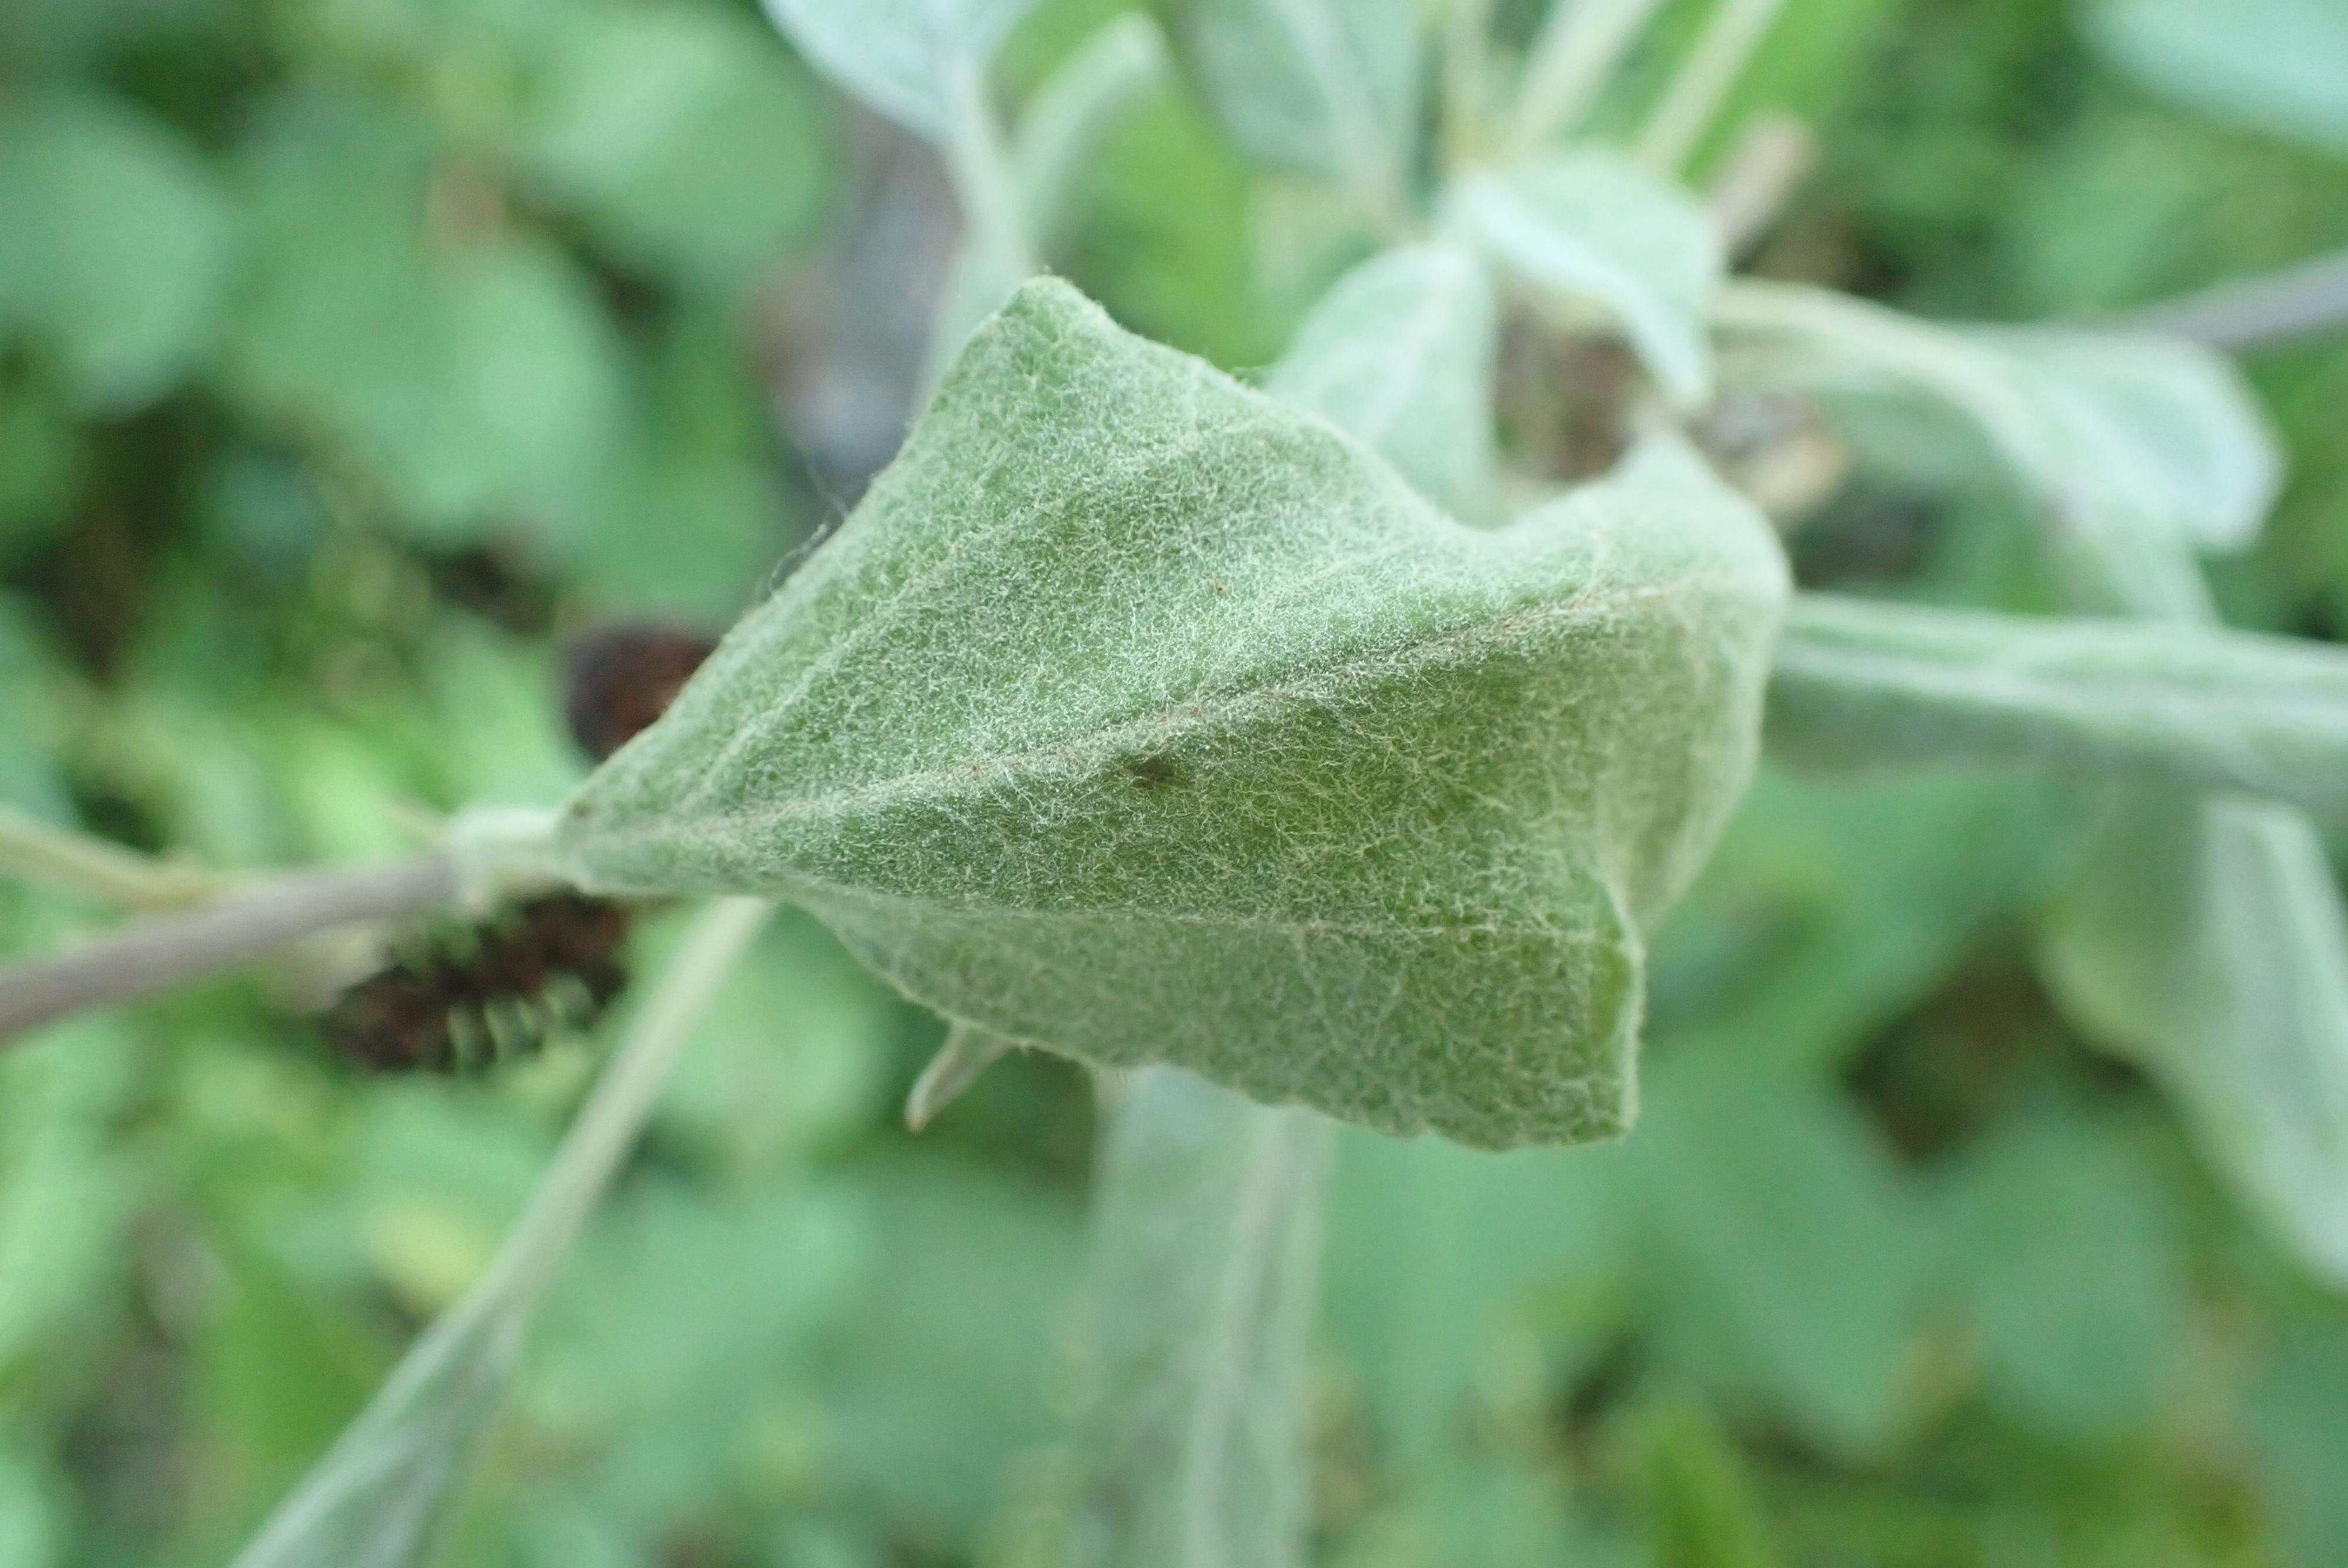

In [39]:
import os
from IPython.display import display, Image

# Base “Train” folder with double nesting
base_train = os.path.join("dataset", "Train", "Train")

# Build the full path to your Powdery image
image_path = os.path.join(base_train, "Powdery", "8a9ed96e66850ba5.jpg")

# Display it inline at 500px width
display(Image(filename=image_path, width=500))


In [41]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1) Define your base dirs (double‑nested)
base_train = os.path.join("dataset", "Train", "Train")
base_valid = os.path.join("dataset", "Validation", "Validation")
base_test  = os.path.join("dataset", "Test",  "Test")

# 2) DataAugmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8,1.2],
    vertical_flip=True,
    fill_mode='nearest'
)

# 3) Only rescaling for validation & test
test_datagen = ImageDataGenerator(rescale=1./255)

# 4) Flow from directory
train_generator = train_datagen.flow_from_directory(
    base_train,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

validation_generator = test_datagen.flow_from_directory(
    base_valid,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    base_test,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 5) Quick sanity check: what classes and how many samples?
print("Classes:", train_generator.class_indices)
print("Training samples:", train_generator.samples)
print("Validation samples:", validation_generator.samples)
print("Test samples:", test_generator.samples)


Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Classes: {'Healthy': 0, 'Powdery': 1, 'Rust': 2}
Training samples: 1322
Validation samples: 60
Test samples: 150


In [6]:
train_generator = train_datagen.flow_from_directory('Train/Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('Validation/Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [3]:
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt

# 1) Make sure your generators use 224×224 to match ResNet50’s default
img_size = (224, 224)

# (Re‑define your generators if needed)
train_generator.target_size = img_size
validation_generator.target_size = img_size
test_generator.target_size = img_size

# 2) Load base model, freezing it
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(img_size[0], img_size[1], 3)
)
base_model.trainable = False

# 3) Add your custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
outputs = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)
model.compile(
    optimizer=Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 4) Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max'),
    TensorBoard(log_dir="./logs", histogram_freq=1)
]

# 5) Initial training
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=callbacks
)

# 6) Fine‑tuning: unfreeze last convolutional block
base_model.trainable = True
# Freeze all layers up to the last 50
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.compile(
    optimizer=Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_finetune = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=callbacks
)

# 7) Evaluate on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.3f}, Test Loss: {test_loss:.3f}")

# 8) Plot training curves
plt.figure()
plt.plot(history.history['accuracy'] + history_finetune.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'] + history_finetune.history['val_accuracy'], label='Validation Acc')
plt.title('Accuracy over Epochs')
plt.legend()

plt.figure()
plt.plot(history.history['loss'] + history_finetune.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'] + history_finetune.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.show()


NameError: name 'train_generator' is not defined

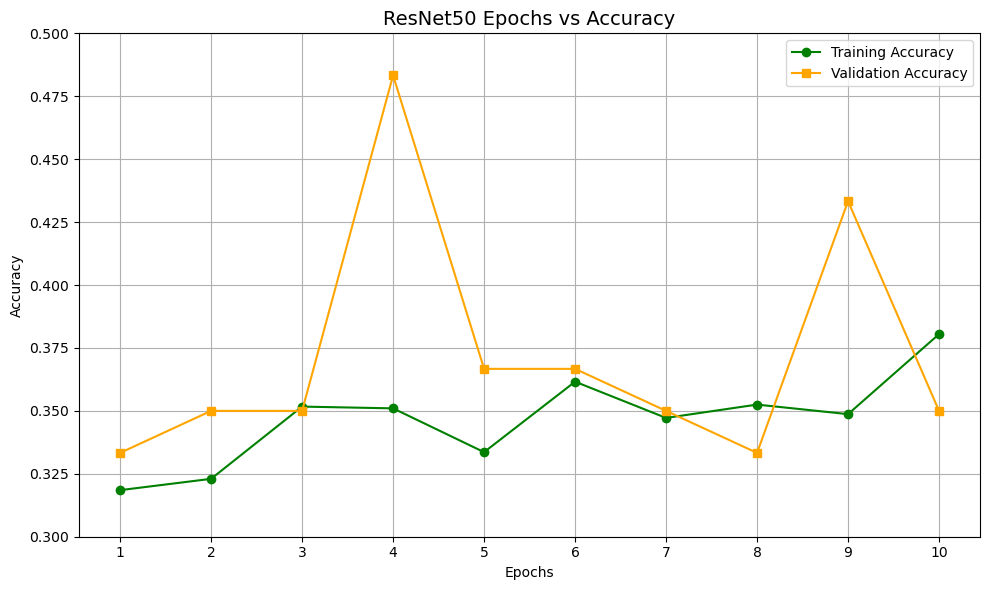

In [1]:
import matplotlib.pyplot as plt

# Epoch numbers
epochs = list(range(1, 11))

# Training and validation accuracy values (from the logs)
train_accuracy = [
    0.3185, 0.3230, 0.3517, 0.3510, 0.3336,
    0.3616, 0.3472, 0.3525, 0.3487, 0.3805
]
val_accuracy = [
    0.3333, 0.3500, 0.3500, 0.4833, 0.3667,
    0.3667, 0.3500, 0.3333, 0.4333, 0.3500
]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, marker='o', label='Training Accuracy', color='green')
plt.plot(epochs, val_accuracy, marker='s', label='Validation Accuracy', color='orange')
plt.title('ResNet50 Epochs vs Accuracy', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.ylim(0.3, 0.5)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
